# 파머완 2.6장 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df= pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# 사이킷런 머신러닝 알고리즘은 Null값을 허용하지 않음
# DataFrame의 fillna()함수를 사용-> Null값을 평균 또는 고정 값으로 변경

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


<ipython-input-3-9f16046bed7b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
<ipython-input-3-9f16046bed7b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [4]:
# 남아있는 문자열 피처들의 값 분류 살펴보기

print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [5]:
# Cabin의 경우 N이 가장 많고, 속성값이 제대로 정리되지 않음
# Cabin 속성의 경우 앞 문자만 추출

titanic_df['Cabin']= titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


성별이 생존 확률에 어떤 영향을 미치는지, 성별에 따른 생존자 수 비교

In [6]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

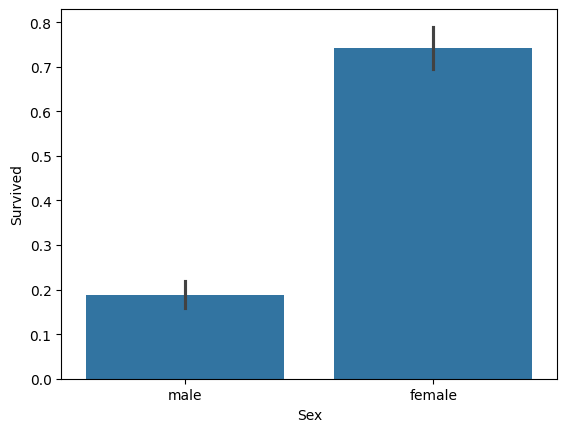

In [7]:
# 시각화로 다시 확인_시본

sns.barplot(x='Sex', y='Survived', data=titanic_df)

부자와 가난한 사람 간 생존 확률

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Pclass', ylabel='Survived'>

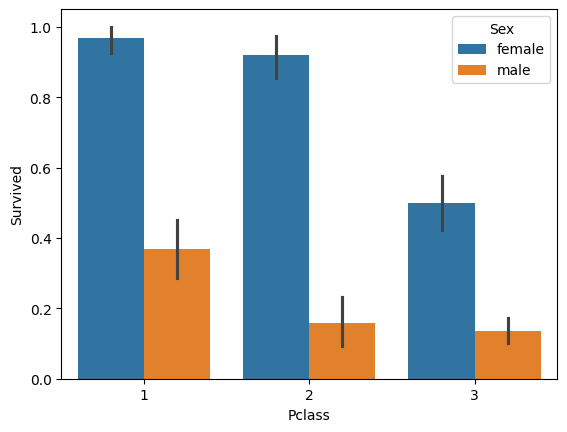

In [8]:
# 부를 측정하는 속성: 객실 등급

sns.barplot(x='Pclass', y='Survived', hue='Sex', data= titanic_df)

Age에 따른 생존 확률

In [9]:
# 값 종류가 많으므로 범위별로 분류하여 카테고리 값 할당
# 입력 age에 따라 구분 값을 반환하는 함수 설정

def get_category(age):
  cat=''
  if age <= -1: cat='Unknown'
  elif age <= 5: cat='Baby'
  elif age <= 12: cat='Child'
  elif age <= 18: cat='Teenager'
  elif age <= 25: cat='Student'
  elif age <= 35: cat='Young Adult'
  elif age <= 60: cat='Adult'
  else: cat='Elderly'

  return cat

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


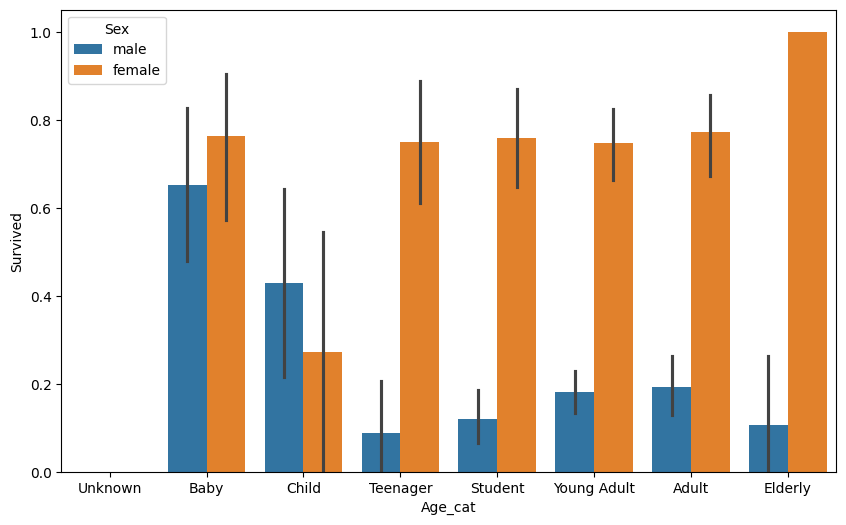

In [10]:
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시
group_names= ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
titanic_df['Age_cat']= titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [11]:
# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn import preprocessing

def encode_features(dataDF):
  features= ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le= preprocessing.LabelEncoder()
    le= le.fit(dataDF[feature])
    dataDF[feature]= le.transform(dataDF[feature])

  return dataDF

titanic_df= encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


피처 가공 내역 정리, 함수로 만들어 쉽게 재사용할 수 있도록 정리
<br>
<br>
데이터의 전처리를 전체적으로 호출하는 함수는 **transform_features()**

In [14]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin']= df['Cabin'].str[:1]
  features= ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le= LabelEncoder()
    le= le.fit(df[feature])
    df[feature]= le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [15]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출

titanic_df= pd.read_csv('./titanic_train.csv')
y_titanic_df= titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df= transform_features(X_titanic_df)

<ipython-input-14-50676e4306b7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-14-50676e4306b7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

생존자 예측

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리. Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf= DecisionTreeClassifier(random_state=11)
rf_clf= RandomForestClassifier(random_state=11)
lr_clf= LogisticRegression()

# DecisionTreeClassifier 학습/예측 평가
dt_clf.fit(X_train, y_train)
dt_pred= dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# Random Forest 학습/예측 평가
rf_clf.fit(X_train, y_train)
rf_pred= rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측 평가
lr_clf.fit(X_train, y_train)
lr_pred= lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


사이킷런의 KFold 클래스를 이용해 교차 검증 수행

In [24]:
# 교차 검증으로 결정트리모델을 좀 더 평가

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 kFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold= KFold(n_splits=folds)
  scores=[]

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test= X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test= y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score= np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


cross_val_score() API를 이용해 교차 검증 수행

In [25]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증{0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도:{0:.4f}".format(np.mean(scores)))

교차 검증0 정확도: 0.7430
교차 검증1 정확도: 0.7753
교차 검증2 정확도: 0.7921
교차 검증3 정확도: 0.7865
교차 검증4 정확도: 0.8427
평균 정확도:0.7879


GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정

In [26]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_depth': [2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf= GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf= grid_dclf.best_estimator_

# GrudSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions= best_dclf.predict(X_test)
accuracy= accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715


# 파머완 3.6장 실습

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data= pd.read_csv('./diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [29]:
# Negative가 상대적으로 많으므로 feature의 타입과 Null의 개수 살펴보기

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
# 피처의 타입이 모두 숫자형이므로 별도의 피처 인코딩은 필요x
# 로지스틱 회귀를 이용해 예측 모델 생성
def get_clf_eval(y_test, pred, pred_proba):
  confusion= confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차 행렬')
  print(confusion)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome칼럼으로 레이블 값-> 칼럼 위치 -1을 이용해 추출
X= diabetes_data.iloc[:, :-1]
y= diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf= LogisticRegression()
lr_clf.fit(X_train, y_train)
pred= lr_clf.predict(X_test)
pred_proba= lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)


오차 행렬
[[90 10]
 [19 35]]
정확도: 0.8117, 정밀도: 0.7778, 재현율: 0.6481,  F1: 0.7071, AUC: 0.8457


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


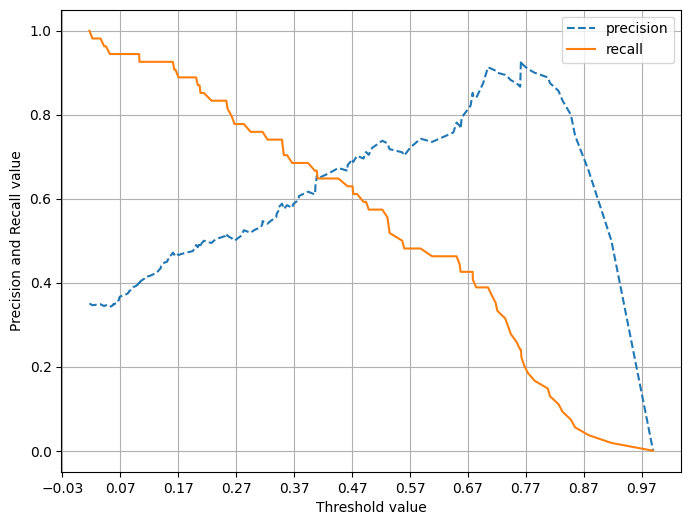

In [42]:
# 전체 데이터의 65%가 Negative-> 재현율 성능에 초점 맞추기
# 정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화 확인
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds= precision_recall_curve(y_test, pred_proba_c1)
  plt.figure(figsize=(8,6))
  threshold_boundary= thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end= plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

pred_proba_c1= lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [43]:
# 정밀도와 재현율이 균형을 맞추었지만 0.7이 안 되는 낮은 수치이므로, 데이터 값을 먼저 점검하기
# 원본 데이터 DataFrame의 describe() 메서드를 호출해 피처 값의 분포도 살펴보기

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

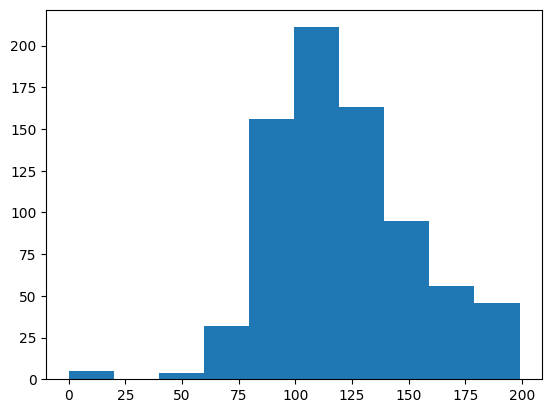

In [44]:
# min()값이 0인 피처가 많음
# 피처의 히스토그램을 확인하여 0 값의 존재 여부를 확인하기

plt.hist(diabetes_data['Glucose'], bins=10)

In [46]:
# 0으로 되어있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 존재 퍼센트 비율 판단
# 확인할 피처는 'Glucose', 'Bloodpressure', 'SkinThickness', 'Insulin', 'BMI'

# 0값을 검사할 피처명 리스트
zero_features= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count= diabetes_data['Glucose'].count()

# 피처 별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산
for feature in zero_features:
  zero_count= diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'. format(feature, zero_count,
                                               100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [47]:
# SkinThickness와 Insulin의 0값이 대단히 많은 상황
# 하지만 전체 데이터 건수가 많지 않기 때문에 일괄적으로 삭제한다면 학습을 효과적으로 수행하기 어려움
# 피처의 0값을 평균값으로 대체하기

mean_zero_features= diabetes_data[zero_features].mean()
diabetes_data[zero_features]= diabetes_data[zero_features].replace(0, mean_zero_features)

In [48]:
# 0값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환
# 로지스틱 회귀의 경우 숫자데이터에 스케일링 적용-> 학습/테스트 데이터 세트로 나누고 로지스틱 회귀 적용

X= diabetes_data.iloc[:, :-1]
y= diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf= LogisticRegression()
lr_clf.fit(X_train, y_train)
pred= lr_clf.predict(X_test)
pred_proba= lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,  F1: 0.6804, AUC: 0.8433


In [64]:
# 재현율 수치의 개선이 필요-> 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도 개선되는지 확인해보기
# 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화 출력

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion= confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc= roc_auc_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict= binarizer.transform(pred_proba_c1)
    print('임곗값: ', custom_threshold)
    get_clf_eval(y_test, custom_predict)

thresholds= [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba= lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값:  0.3
오차 행렬
[[67 33]
 [10 44]]
정확도: 0.7208, 정밀도: 0.5714, 재현율: 0.8148,  F1:0.6718, AUC:0.7424
임곗값:  0.33
오차 행렬
[[74 26]
 [12 42]]
정확도: 0.7532, 정밀도: 0.6176, 재현율: 0.7778,  F1:0.6885, AUC:0.7589
임곗값:  0.36
오차 행렬
[[76 24]
 [14 40]]
정확도: 0.7532, 정밀도: 0.6250, 재현율: 0.7407,  F1:0.6780, AUC:0.7504
임곗값:  0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,  F1:0.6667, AUC:0.7419
임곗값:  0.42
오차 행렬
[[80 20]
 [16 38]]
정확도: 0.7662, 정밀도: 0.6552, 재현율: 0.7037,  F1:0.6786, AUC:0.7519
임곗값:  0.45
오차 행렬
[[86 14]
 [17 37]]
정확도: 0.7987, 정밀도: 0.7255, 재현율: 0.6852,  F1:0.7048, AUC:0.7726
임곗값:  0.48
오차 행렬
[[87 13]
 [19 35]]
정확도: 0.7922, 정밀도: 0.7292, 재현율: 0.6481,  F1:0.6863, AUC:0.7591
임곗값:  0.5
오차 행렬
[[90 10]
 [19 35]]
정확도: 0.8117, 정밀도: 0.7778, 재현율: 0.6481,  F1:0.7071, AUC:0.7741


In [65]:
# 임곗값을 0.48로 낮춘 상태에서 다시 예측
# predict()메서드는 임곘값을 마음대로 변환할 수 없음-> 별도의 로직으로 구하기

binarizer= Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba()예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer변환
pred_th_048= binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[87 13]
 [19 35]]
정확도: 0.7922, 정밀도: 0.7292, 재현율: 0.6481,  F1:0.6863, AUC:0.7591
